## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [21]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned OFF


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [22]:
filename = './images/lena-grey.bmp'
lena_im = io.imread(filename)
lena_nearest = misc.imresize(lena_im, 20, interp='nearest') #the size of an output image is now 20 times less
lena_bilinear = misc.imresize(lena_im, 20, interp='bilinear')
lena_bicubic = misc.imresize(lena_im, 20, interp='bicubic')

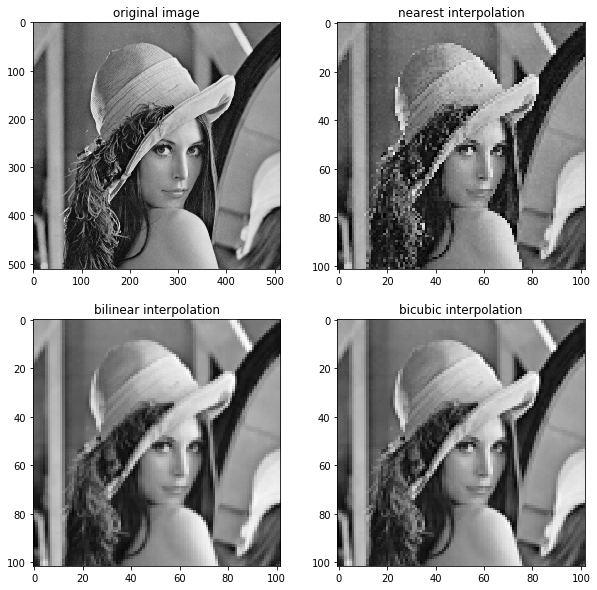

In [23]:
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax0, ax1, ax2, ax3= axes.ravel()
ax0.imshow(lena_im, cmap=cm.gray)
ax0.set_title('original image')
ax1.imshow(lena_nearest, cmap=cm.gray)
ax1.set_title('nearest interpolation')
ax2.imshow(lena_bilinear, cmap=cm.gray)
ax2.set_title('bilinear interpolation')
ax3.imshow(lena_bicubic, cmap=cm.gray)
ax3.set_title('bicubic interpolation')

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


C:\Users\home\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


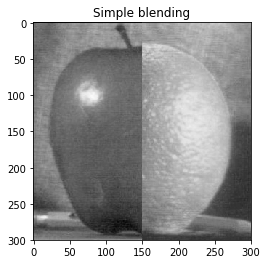

In [83]:
def simple_blend(img1, img2):

    img = np.zeros(np.shape(img1)) 
    row, col = np.shape(img)
    for i in range(0, row):
        for j in range(0, col):
            img[i,j]=img2[i,j]
    for i in range(0, row):
        for j in range(0, np.ceil(col/2).astype('ubyte')):
            img[i,j]=img1[i,j]
    return img

from skimage.color import rgb2gray
filename = './images/apple.jpeg'
apple_im = io.imread(filename)
apple_gray=rgb2gray(apple_im) 
apple_gray=img_as_ubyte(apple_gray)

filename = './images/orange.jpeg'
orange_im = io.imread(filename)
orange_gray=rgb2gray(orange_im)
orange_gray=img_as_ubyte(orange_gray)


                       
blend_img = simple_blend(apple_gray, orange_gray)

plt.imshow(blend_img, cmap=cm.gray)
plt.title ('Simple blending')

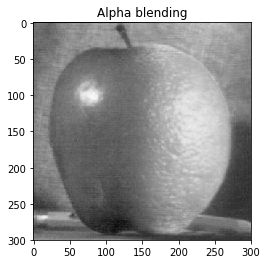

In [84]:
def alpha_blend(img1, img2, window):
    blend_img = simple_blend(img1, img2)
    row, col = blend_img.shape 
    x1 = np.ceil(col/2).astype('ubyte')-window   
    x2 = np.ceil(col/2).astype('ubyte')+window   
    x = np.arange(x1, x2)
    alpha = x/(x1-x2)-x2/(x1-x2)
    for i in range(0, row):
        for j in range(x1,x2):
            blend_img[i,j] = alpha[j - np.ceil(col/2).astype('ubyte')-window]*img1[i,j] + (1-alpha[j - np.ceil(col/2).astype('ubyte')-window])*img2[i,j]
    return blend_img 
     

blend_img = alpha_blend(apple_gray, orange_gray, 30)

plt.imshow(blend_img, cmap = cm.gray)
plt.title ('Alpha blending')




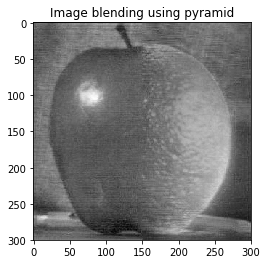

In [81]:
def pyramid_blend (img1, img2):
    row, col = img1.shape
    #Laplacian pyramids of 2 images
    pl_img1 = tuple(transform.pyramid_laplacian(img1, 6))
    pl_img2 = tuple(transform.pyramid_laplacian(img2, 6))
    
    #define a mask (0 at the left, 1 at the right)
    mask = np.zeros(img1.shape).astype(float)/255
    mask[:, : int(np.ceil(col/2))] = 1.0
    mask[:, int(np.ceil(col/2)) :] = 0.0
    #create gaussian of mask
    gaussian_mask = tuple(transform.pyramid_gaussian(mask, 6))

    #blend two Laplacian pyramids applying mask
    blended_pyr = []
    k = len(gaussian_mask)
    for i in range(0,k):
        p1= gaussian_mask[i]*pl_img1[i]
        p2=(1 - gaussian_mask[i])*pl_img2[i]
        blended_pyr.append(p1 + p2)
  
    #collapse the pyramid
    pyr = blended_pyr[6]  
    for i in range(5,-1,-1):
        pyr = transform.pyramid_expand(pyr) 
        if pyr.shape > blended_pyr[i].shape:
            pyr = np.delete(pyr, (-1), axis=0)
            pyr = np.delete(pyr, (-1), axis=1)
        pyr = pyr + blended_pyr[i]
    return pyr

    
blend_img = pyramid_blend(apple_gray, orange_gray)

plt.imshow(blend_img, cmap = cm.gray)
plt.title ('Image blending using pyramid')
            
